In [1]:
from time import time
import logging
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics

from sklearn.model_selection import train_test_split

from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


#  Importing Tensorflow
import tensorflow as tf
# Importing keras
from tensorflow import keras

print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')




Automatically created module for IPython interactive environment


In [2]:
# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

In [3]:


# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples) # Number of Samples
print("n_features: %d" % n_features) # Number of Features
print("n_classes: %d" % n_classes) # Number of Classes

# Dimensions of images
print("Dimensions:")
print("Picture height: %d" % h)
print("Picture width: %d" % w)

# Names of targets
target_names

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
Dimensions:
Picture height: 50
Picture width: 37


array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [4]:
# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42)


# Random state is used to make the randomization constant between runs

In [5]:
# Scale images to the [0, 1] range
# X_train = X_train / 255.0
# X_test = X_test / 255.0

# Make sure images have shape (50, 37, 1), based on image dimensions 
X_train = X_train.reshape(len(X_train), 50, 37, 1)
X_test = X_test.reshape(len(X_test), 50, 37, 1)


In [6]:
## Build the model
model = keras.Sequential([
    keras.Input(shape=(50,37,1)),
    keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(n_classes,activation= "softmax")
    
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

## Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=128)


## Evaluate the trained model
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('\n Test accuracy:', test_acc)
print('\n Test loss:', test_loss)

model.summary()

2022-10-06 14:20:03.149629: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-10-06 14:20:03.405466: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
9/9 [==============================] - 2s 94ms/step - loss: 51.9981 - accuracy: 0.2112
Epoch 2/50
9/9 [==============================] - 1s 91ms/step - loss: 2.0260 - accuracy: 0.2724
Epoch 3/50
9/9 [==============================] - 1s 100ms/step - loss: 1.7047 - accuracy: 0.3985
Epoch 4/50
9/9 [==============================] - 1s 97ms/step - loss: 1.4811 - accuracy: 0.4918
Epoch 5/50
9/9 [==============================] - 1s 91ms/step - loss: 1.2626 - accuracy: 0.5338
Epoch 6/50
9/9 [==============================] - 1s 91ms/step - loss: 1.1259 - accuracy: 0.5978
Epoch 7/50
9/9 [==============================] - 1s 91ms/step - loss: 1.0143 - accuracy: 0.6453
Epoch 8/50
9/9 [==============================] - 1s 90ms/step - loss: 0.9346 - accuracy: 0.6856
Epoch 9/50
9/9 [==============================] - 1s 92ms/step - loss: 0.8564 - accuracy: 0.7057
Epoch 10/50
9/9 [==============================] - 1s 90ms/step - loss: 0.8024 - accuracy: 0.7258
Epoch 11/50
9/9 [==========

In [7]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


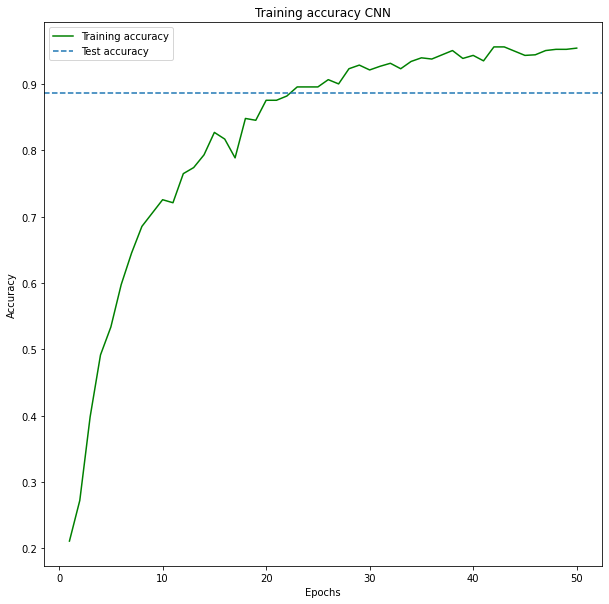

In [8]:
# Plotting Test and Training Accuracy
acc_train = history.history['accuracy']
epochs = range(1,51)
plt.subplots(figsize = (10,10))
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
# Add a horizontal line (Test Accuracy)
plt.axhline(test_acc, linestyle = "--", label='Test accuracy')
plt.title('Training accuracy CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("plot_acc3.png")
plt.show()


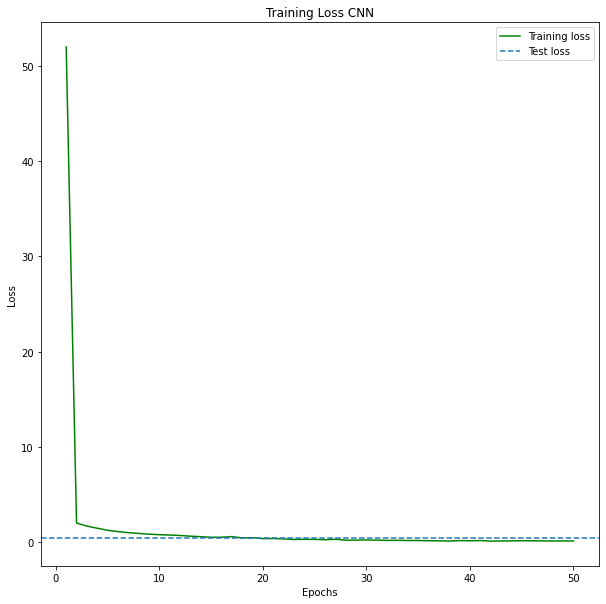

In [9]:
# Plotting Test and Training loss
loss_train = history.history['loss']
epochs = range(1,51)
plt.subplots(figsize = (10,10))
plt.plot(epochs, loss_train, 'g', label='Training loss')
# Add a horizontal line (Test Accuracy)
plt.axhline(test_loss, linestyle = "--", label='Test loss')
plt.title('Training Loss CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("plot_loss3.png")
plt.show()

In [10]:
# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = model.predict(X_test)
print("done in %0.3fs" % (time() - t0))



Predicting people's names on the test set
done in 0.202s


In [11]:
# Transforming y_pred
y_pred_labels = np.argmax(y_pred, axis=1)
y_pred_labels

array([3, 3, 6, 3, 3, 3, 4, 1, 3, 3, 3, 3, 3, 5, 3, 3, 1, 3, 3, 4, 1, 6,
       3, 5, 0, 1, 0, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1,
       1, 1, 4, 3, 3, 3, 3, 3, 0, 3, 6, 2, 1, 5, 5, 3, 1, 1, 1, 4, 3, 5,
       4, 4, 1, 3, 1, 6, 3, 3, 3, 2, 1, 6, 3, 1, 3, 0, 4, 3, 3, 1, 3, 3,
       3, 3, 3, 6, 3, 4, 1, 5, 1, 1, 6, 6, 3, 1, 3, 1, 3, 6, 3, 3, 3, 1,
       4, 1, 3, 4, 3, 1, 3, 4, 1, 3, 1, 3, 3, 0, 3, 4, 4, 3, 1, 3, 6, 6,
       6, 5, 3, 4, 3, 3, 1, 6, 2, 2, 5, 1, 3, 5, 1, 3, 6, 1, 5, 1, 1, 3,
       3, 3, 6, 3, 1, 3, 6, 5, 5, 1, 3, 1, 5, 1, 0, 3, 1, 1, 4, 1, 5, 6,
       3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2])

In [12]:
y_test

array([3, 3, 6, 3, 3, 3, 4, 1, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 4, 1, 2,
       3, 2, 0, 1, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1,
       1, 1, 4, 3, 2, 3, 3, 3, 0, 3, 6, 2, 1, 3, 5, 3, 1, 1, 1, 4, 3, 5,
       6, 4, 1, 3, 5, 6, 3, 3, 3, 2, 1, 6, 4, 4, 3, 0, 4, 3, 3, 3, 3, 3,
       3, 3, 3, 6, 3, 4, 1, 5, 1, 1, 6, 6, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1,
       4, 1, 3, 3, 3, 1, 3, 4, 1, 3, 1, 3, 3, 0, 3, 4, 4, 3, 1, 1, 6, 6,
       6, 6, 2, 4, 3, 3, 1, 6, 2, 2, 5, 1, 3, 5, 1, 3, 6, 1, 5, 1, 1, 3,
       3, 3, 6, 0, 1, 3, 6, 5, 5, 1, 3, 5, 5, 1, 0, 3, 1, 1, 6, 1, 5, 6,
       3, 2, 2, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2])

In [13]:
#Classification Report

class_report = metrics.classification_report(y_test, y_pred_labels, target_names=target_names,zero_division=1,  output_dict=False)
print(class_report)    
class_report1 = classification_report(y_test, y_pred_labels, target_names=target_names,zero_division=1, output_dict=True)

                   precision    recall  f1-score   support

     Ariel Sharon       0.83      0.83      0.83         6
     Colin Powell       0.86      0.97      0.91        38
  Donald Rumsfeld       1.00      0.69      0.81        16
    George W Bush       0.93      0.93      0.93        88
Gerhard Schroeder       0.80      0.80      0.80        15
      Hugo Chavez       0.71      0.83      0.77        12
       Tony Blair       0.88      0.79      0.83        19

         accuracy                           0.89       194
        macro avg       0.86      0.84      0.84       194
     weighted avg       0.89      0.89      0.89       194



In [14]:
#Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_labels, labels=range(n_classes))
print(conf_matrix)   


[[ 5  0  0  1  0  0  0]
 [ 0 37  0  1  0  0  0]
 [ 1  0 11  2  0  1  1]
 [ 0  3  0 82  1  1  1]
 [ 0  1  0  2 12  0  0]
 [ 0  2  0  0  0 10  0]
 [ 0  0  0  0  2  2 15]]


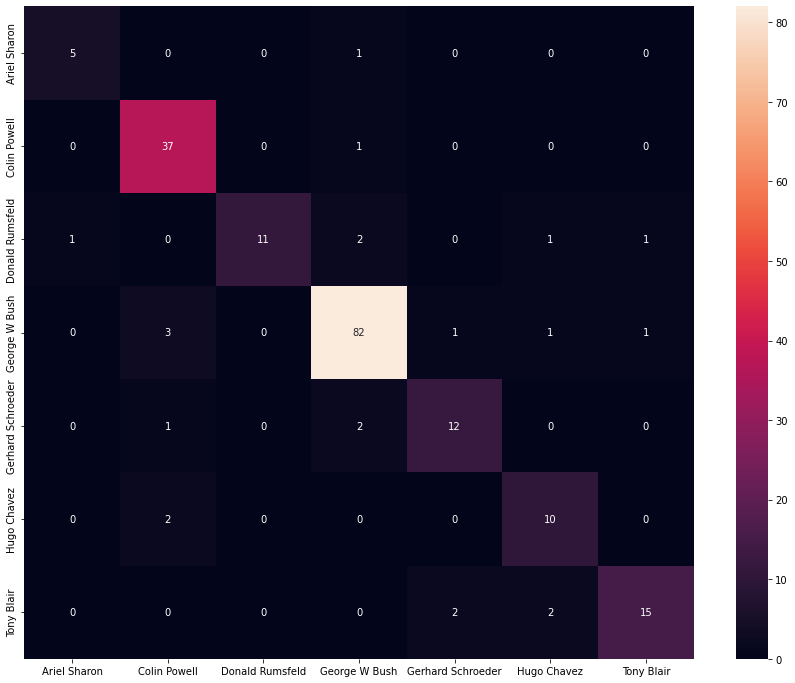

In [15]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,12)) 
sns.heatmap(conf_matrix, annot=True, xticklabels= (target_names), yticklabels= (target_names));
# Export plot
plt.savefig('conf_matrix3.jpg')

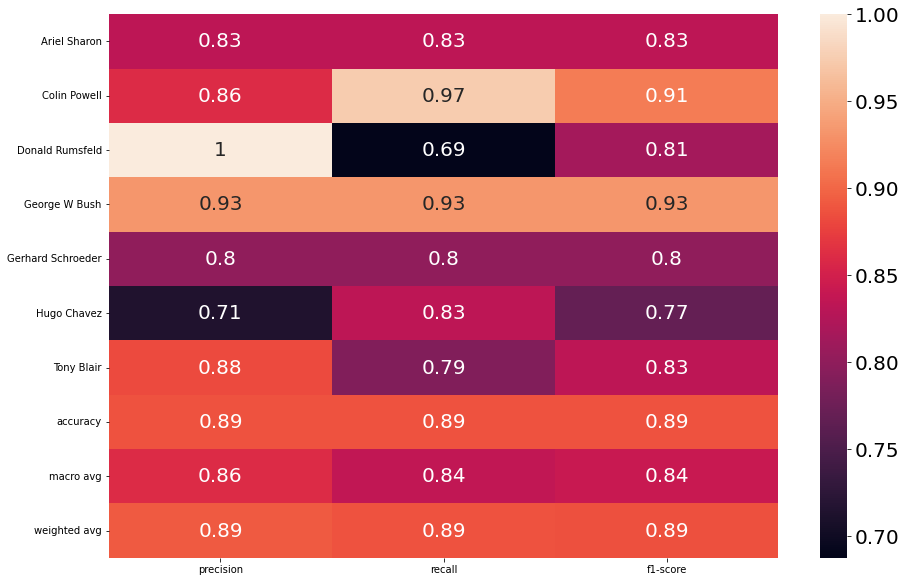

In [16]:
import pandas as pd
fig, ax = plt.subplots(figsize=(15,10)) 
plt.rcParams['font.size'] = '20'
sns.heatmap(pd.DataFrame(class_report1).iloc[:-1, :].T, annot=True,)
plt.savefig('class_report3.jpg')

In [17]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 9ms/step - loss: 0.4548 - accuracy: 0.8866


[0.4548451602458954, 0.8865979313850403]